In [1]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer as kdb
from preprocess_qcd_top_jets import *

In [2]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True

In this notebook I will demonstrate how to jets in the Lund plane representation into images that can be fed to a neural network.

Useful reference for the Lund jet plane: https://arxiv.org/pdf/1807.04758.pdf

In [3]:
qcd_lund_jets = np.load( "qcd_lund_jets.npy", allow_pickle=True )
top_lund_jets = np.load( "top_lund_jets.npy", allow_pickle=True )

Now I want to separate the data into separate planes:

In [75]:
# the default weight=1 corresponds to pt, 2 is mass, 3 is mass drop, ...
def get_plane_w( lund_jet_sample, plane_id, weight=1):
    return [ [ [i[6],i[7],i[weight]] for i in jet if i[0]==plane_id ] for jet in lund_jet_sample ]

qcd_lund_0 = get_plane_w( qcd_lund_jets, 0 )
qcd_lund_1 = get_plane_w( qcd_lund_jets, 1 )
qcd_lund_2 = get_plane_w( qcd_lund_jets, 2 )
qcd_lund_3 = get_plane_w( qcd_lund_jets, 3 )

top_lund_0 = get_plane_w( top_lund_jets, 0 )
top_lund_1 = get_plane_w( top_lund_jets, 1 )
top_lund_2 = get_plane_w( top_lund_jets, 2 )
top_lund_3 = get_plane_w( top_lund_jets, 3 )

Getting the jet masses:

In [5]:
qcd_masses = np.array( [ np.max( [ i[2] for i in jet ] ) for jet in qcd_lund_jets ] )
top_masses = np.array( [ np.max( [ i[2] for i in jet ] ) for jet in top_lund_jets ] )

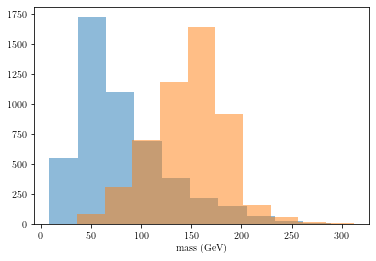

In [6]:
plt.hist(qcd_masses, alpha=0.5)
plt.hist(top_masses, alpha=0.5)
plt.xlabel("mass (GeV)")
plt.show()

And then flatten the arrays so that we can look at the different densities for QCD vs top:

In [7]:
def flatten( lund_jet_sample ):
    jf = []
    for jet in lund_jet_sample:
        jf += jet
    return jf

def flatten_w( lund_jet_sample ):
    jf = []
    for jet in lund_jet_sample:
        jf += [ i[0:2] for i in jet ]
    return jf

qcd_lund_0_flat = flatten_w( qcd_lund_0 )
qcd_lund_1_flat = flatten_w( qcd_lund_1 )
qcd_lund_2_flat = flatten_w( qcd_lund_2 )
qcd_lund_3_flat = flatten_w( qcd_lund_3 )

top_lund_0_flat = flatten_w( top_lund_0 )
top_lund_1_flat = flatten_w( top_lund_1 )
top_lund_2_flat = flatten_w( top_lund_2 )
top_lund_3_flat = flatten_w( top_lund_3 )

And then plot:

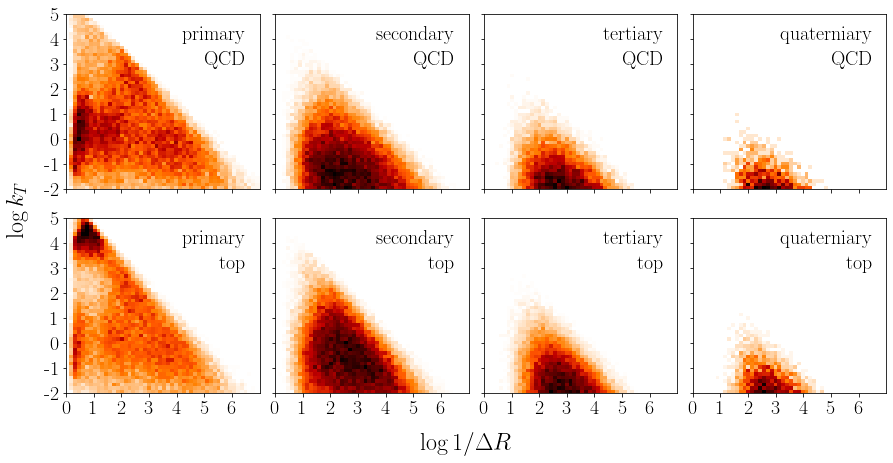

In [8]:
fig,axs = plt.subplots(2,4,figsize=(12,6))
bins = (50,50)
rnge = ((0,7),(-2,5))
cmap = 'gist_heat_r'

xt = [ i for i in range(rnge[0][0],rnge[0][1],1) ]
yt = [ i for i in range(rnge[1][0],rnge[1][1]+1,1) ]

labelfont = FontProperties()
labelfont.set_family('serif')
labelfont.set_name('Times New Roman')
labelfont.set_size(20)

axislabelfont = FontProperties()
axislabelfont.set_family('serif')
axislabelfont.set_name('Times New Roman')
axislabelfont.set_size(24)

tickfont = FontProperties()
tickfont.set_family('serif')
tickfont.set_name('Times New Roman')
tickfont.set_size(20)

def get_x( arr ):
    return [ i[0] for i in arr ]
def get_y( arr ):
    return [ i[1] for i in arr ]

axisfontsize = 18
labelfontsize = 18
axs[0,0].hist2d( get_x( qcd_lund_0_flat ), get_y( qcd_lund_0_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,1].hist2d( get_x( qcd_lund_1_flat ), get_y( qcd_lund_1_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,2].hist2d( get_x( qcd_lund_2_flat ), get_y( qcd_lund_2_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,3].hist2d( get_x( qcd_lund_3_flat ), get_y( qcd_lund_3_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,0].hist2d( get_x( top_lund_0_flat ), get_y( top_lund_0_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,1].hist2d( get_x( top_lund_1_flat ), get_y( top_lund_1_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,2].hist2d( get_x( top_lund_2_flat ), get_y( top_lund_2_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,3].hist2d( get_x( top_lund_3_flat ), get_y( top_lund_3_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,0].text( 6.5, 4.5,  "primary", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( 6.5, 4.5,  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( 6.5, 4.5,  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( 6.5, 4.5,  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[0,0].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( 6.5, 4.5,  "primary", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( 6.5, 4.5,  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( 6.5, 4.5,  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( 6.5, 4.5,  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[0,0].set_xticks( xt ) 
axs[0,1].set_xticks( xt ) 
axs[0,2].set_xticks( xt ) 
axs[0,3].set_xticks( xt ) 
axs[1,0].set_xticks( xt ) 
axs[1,1].set_xticks( xt ) 
axs[1,2].set_xticks( xt ) 
axs[1,3].set_xticks( xt )
axs[0,0].set_yticks( yt ) 
axs[0,1].set_yticks( yt ) 
axs[0,2].set_yticks( yt ) 
axs[0,3].set_yticks( yt ) 
axs[1,0].set_yticks( yt ) 
axs[1,1].set_yticks( yt )
axs[1,2].set_yticks( yt ) 
axs[1,3].set_yticks( yt ) 
axs[1,0].set_xticklabels( xt, fontproperties=tickfont )
axs[1,1].set_xticklabels( xt, fontproperties=tickfont )
axs[1,2].set_xticklabels( xt, fontproperties=tickfont )
axs[1,3].set_xticklabels( xt, fontproperties=tickfont )
axs[0,0].set_yticklabels( yt, fontproperties=tickfont )
axs[1,0].set_yticklabels( yt, fontproperties=tickfont )
axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,2].set_xticklabels([])
axs[0,3].set_xticklabels([])
axs[0,1].set_yticklabels([])
axs[0,2].set_yticklabels([])
axs[0,3].set_yticklabels([])
axs[1,1].set_yticklabels([])
axs[1,2].set_yticklabels([])
axs[1,3].set_yticklabels([])
fig.text( -0.03, 0.5, r'$\log k_T$', va='center', rotation='vertical', fontproperties=axislabelfont )
fig.text( 0.5, -0.05, r'$\log 1/\Delta R$', ha='center', fontproperties=axislabelfont )
fig.tight_layout()
#fig.savefig("qcd_top_all_lund.pdf", bbox_inches = "tight")
#fig.show()

Now I want to convert just the primary Lund plane into the image format.  We'll go for the same idea as with the jet images, i.e. a 40x40 image.  This is not ideal, since about half of the image is guaranteed to be empty.  But it'll do as a comparison to start with.

To do this I'll use the scikit-learn function KBinsDiscretizer. 

Also, to start with we will use just one-hot encoded images.  Afterwards we can think about filling these one-hot encoded entries with data, like the pT of the subjet at that splitting or something.

First we cut the data down to the range we want it at:

In [81]:
def cut_to_range_w( data, cuts, dim=2):
    if dim != len(cuts):
        print("ERROR: dimensions of cuts should match number of observables")
        sys.exit()
    new_data = []
    weights = []
    for jet in data:
        new_jet = []
        new_wghts = []
        for splitting in jet:
            keep = True
            for i in range(len(splitting)-1):                
                if cuts[i]==None:
                    pass
                elif splitting[i]<cuts[i][0] or splitting[i]>cuts[i][1]:
                    keep = False
            if keep == True:
                new_jet.append(splitting[0:2])
                new_wghts.append(splitting[2])
        if len(new_jet)>0:
            new_data.append(new_jet)
            weights.append(new_wghts)
    return new_data, weights

To calculate the transform we also need to flatten the data so that all splittings are in a single list.

In [25]:
qcd_lund_0_cut, qcd_lund_0_wghts_cut = cut_to_range_w( qcd_lund_0, ((0,7),(-2,6)) )
top_lund_0_cut, top_lund_0_wghts_cut = cut_to_range_w( top_lund_0, ((0,7),(-2,6)) )

qcd_lund_0_flat_cut = flatten( qcd_lund_0_cut )
top_lund_0_flat_cut = flatten( top_lund_0_cut )

Now I define the transform, and then fit it using the a concatenation of the top and qcd jets.

Note that because we're using a uniform strategy, the one transformer can be used on datasets with different amounts of signal and background.  However if we used another strategy which looks at the density of the data then we would need a new transformer for every dataset we use.

In [27]:
transform = kbd( n_bins=[40,40], encode='ordinal', strategy='uniform' )

In [28]:
transform.fit( qcd_lund_0_flat_cut + top_lund_0_flat_cut )

KBinsDiscretizer(encode='ordinal', n_bins=[40, 40], strategy='uniform')

Now we use the transform to transform each event individually.

In [29]:
qcd_lund_0_ord = [ transform.transform(i) for i in qcd_lund_0_cut ]
top_lund_0_ord = [ transform.transform(i) for i in top_lund_0_cut ]
qcd_lund_0_flat_ord = transform.transform( qcd_lund_0_flat_cut )
top_lund_0_flat_ord = transform.transform( top_lund_0_flat_cut )

This gets the data into the 'ordinal' form, where it's the bin numbers that are specified:

In [30]:
qcd_lund_0_ord[1]

array([[ 1., 12.],
       [ 6., 15.],
       [ 9.,  9.],
       [11.,  6.],
       [15., 20.],
       [16.,  0.],
       [20., 18.],
       [22., 11.],
       [27.,  5.],
       [29.,  0.]])

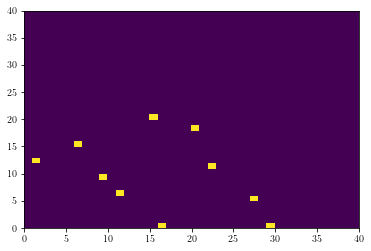

In [31]:
plt.hist2d( qcd_lund_0_ord[1][:,0], qcd_lund_0_ord[1][:,1], bins=40, range=((0,40),(0,40)) )
plt.show()

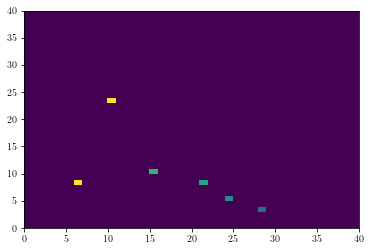

In [33]:
j=1
plt.hist2d( top_lund_0_ord[j][:,0], top_lund_0_ord[j][:,1], bins=40, range=((0,40),(0,40)), 
           weights=top_lund_0_wghts_cut[j] )
plt.show()

But we need these in the one-hot encoded format:

In [40]:
def ord2onehot(data_ord, lims):
    img = np.zeros((lims[0],lims[1]))
    for i in data_ord:
        img[ lims[1] - 1 - int(i[1]), int(i[0]) ] = 1
    return img

def ord2onehot_w(data_ord, lims, weights):
    img = np.zeros((lims[0],lims[1]))
    for i in range(len(data_ord)):
        img[ lims[1] - 1 - int( data_ord[i][1] ), int( data_ord[i][0] ) ] = weights[i]
    return img

In [37]:
top_lund_0_wghts_cut[0]

[640.3985140886667,
 637.4636631640077,
 607.9230544971394,
 446.8304232928609,
 421.70911197237024,
 351.2886465821619,
 280.985523632888,
 255.2015760903274,
 213.7350875782884]

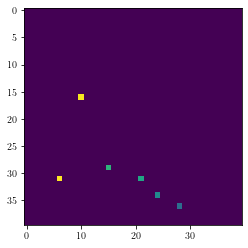

In [42]:
j=1
plt.imshow( ord2onehot_w( top_lund_0_ord[j], [40,40], top_lund_0_wghts_cut[j] ) )

We can see above that the one-hot encoding has worked, below I just test the reshaping etc..

In [43]:
testimg = ord2onehot_w( top_lund_0_ord[j], [40,40], top_lund_0_wghts_cut[j] ).reshape(-1)

In [44]:
testimg.shape

(1600,)

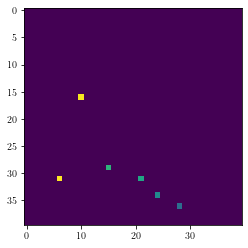

In [45]:
plt.imshow( testimg.reshape((40,40)) )

Now we can one-hot encode all of the jets and save them out separately for QCD and tops.

I want to save them both as h5 and as npy.

In [49]:
qcd_lund_0_ohw = []
for jet,wght in zip(qcd_lund_0_ord,qcd_lund_0_wghts_cut):
    qcd_lund_0_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )
qcd_lund_0_ohw = np.array( qcd_lund_0_ohw )

top_lund_0_ohw = []
for jet,wght in zip(top_lund_0_ord,top_lund_0_wghts_cut):
    top_lund_0_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )
top_lund_0_ohw = np.array( top_lund_0_ohw )

In [53]:
qcd_lund_0_ohw_2 = np.array( [ np.concatenate( ( qcd_lund_0_ohw[i], np.array([0]), [qcd_masses[i]] ), axis=-1 ) 
                                 for i in range(len(qcd_lund_0_ohw)) ] )
top_lund_0_ohw_2 = np.array( [ np.concatenate( ( top_lund_0_ohw[i], np.array([0]), [top_masses[i]] ), axis=-1 ) 
                                 for i in range(len(top_lund_0_ohw)) ] )

In [59]:
np.save( "qcd_lund_0_ohw.npy", qcd_lund_0_ohw )
np.save( "top_lund_0_ohw.npy", top_lund_0_ohw )

qcd_out = pd.DataFrame( qcd_lund_0_ohw_2, columns=[str(i) for i in range(1600)]+["__signal_col__"]+["__mass_Col__"] )
top_out = pd.DataFrame( top_lund_0_ohw_2, columns=[str(i) for i in range(1600)]+["__signal_col__"]+["__mass_Col__"] )

qcd_out.to_hdf( "qcd_lund_0_ohw.h5", "table", format="table", complib="blosc", complevel=5 )
top_out.to_hdf( "top_lund_0_ohw.h5", "table", format="table", complib="blosc", complevel=5 )

Now to test loading them in.

First, numpy:

In [60]:
qcd_in = np.load("qcd_lund_0_ohw.npy", allow_pickle=True)
top_in = np.load("top_lund_0_ohw.npy", allow_pickle=True)

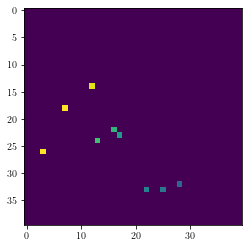

In [61]:
plt.imshow( top_in[0].reshape((40,40)) )

Now for h5:

In [66]:
df_qcd_in = pd.read_hdf( "qcd_lund_0_ohw.h5", key="table", start=0, stop=10000 )
df_top_in = pd.read_hdf( "top_lund_0_ohw.h5", key="table", start=0, stop=10000 )

data_qcd = np.zeros( ( df_qcd_in.shape[0], 1600 ) )
labels_qcd = np.zeros( df_qcd_in.shape[0] )
masses_qcd = np.zeros( df_qcd_in.shape[0] )
for i in range( df_qcd_in.shape[0] ):
    data_qcd[i] = df_qcd_in.to_numpy()[i][0:1600]
    labels_qcd[i] = df_qcd_in.to_numpy()[i][1600]
    masses_qcd[i] = df_qcd_in.to_numpy()[i][1601]
    
data_top = np.zeros( ( df_top_in.shape[0], 1600 ) )
labels_top = np.zeros( df_top_in.shape[0] )
masses_top = np.zeros( df_top_in.shape[0] )
for i in range( df_top_in.shape[0] ):
    data_top[i] = df_top_in.to_numpy()[i][0:1600]
    labels_top[i] = df_top_in.to_numpy()[i][1600]
    masses_top[i] = df_top_in.to_numpy()[i][1601]

In [67]:
labels_qcd.shape

(4920,)

In [68]:
data_top.shape

(5080, 1600)

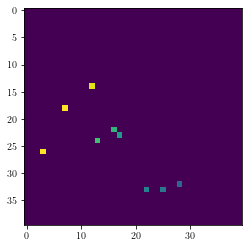

In [71]:
plt.imshow( data_top[0].reshape((40,40)) )

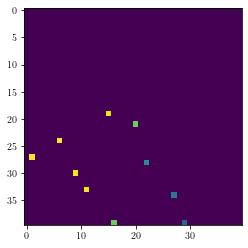

In [72]:
plt.imshow( data_qcd[1].reshape((40,40)) )

It works!

This code has been summarised in lund2img.py

Perfect!

Now let's look at the averages with this weighted data.

In [132]:
def get_plane_w( lund_jet_sample, plane_id, weight=9):
    if weight==None:
        return [ [ [i[6],i[7],1.0] for i in jet if i[0]==plane_id ] for jet in lund_jet_sample ]
    else:
        return [ [ [i[6],i[7],i[weight]] for i in jet if i[0]==plane_id ] for jet in lund_jet_sample ]

qcd_lund_0 = get_plane_w( qcd_lund_jets, 0)
qcd_lund_1 = get_plane_w( qcd_lund_jets, 1)
qcd_lund_2 = get_plane_w( qcd_lund_jets, 2)
qcd_lund_3 = get_plane_w( qcd_lund_jets, 3)

top_lund_0 = get_plane_w( top_lund_jets, 0)
top_lund_1 = get_plane_w( top_lund_jets, 1)
top_lund_2 = get_plane_w( top_lund_jets, 2)
top_lund_3 = get_plane_w( top_lund_jets, 3)

qcd_lund_0_cut, qcd_lund_0_wghts_cut = cut_to_range_w( qcd_lund_0, ((0,7),(-2,6)) )
top_lund_0_cut, top_lund_0_wghts_cut = cut_to_range_w( top_lund_0, ((0,7),(-2,6)) )

qcd_lund_1_cut, qcd_lund_1_wghts_cut = cut_to_range_w( qcd_lund_1, ((0,7),(-2,6)) )
top_lund_1_cut, top_lund_1_wghts_cut = cut_to_range_w( top_lund_1, ((0,7),(-2,6)) )

qcd_lund_2_cut, qcd_lund_2_wghts_cut = cut_to_range_w( qcd_lund_2, ((0,7),(-2,6)) )
top_lund_2_cut, top_lund_2_wghts_cut = cut_to_range_w( top_lund_2, ((0,7),(-2,6)) )

qcd_lund_3_cut, qcd_lund_3_wghts_cut = cut_to_range_w( qcd_lund_3, ((0,7),(-2,6)) )
top_lund_3_cut, top_lund_3_wghts_cut = cut_to_range_w( top_lund_3, ((0,7),(-2,6)) )

qcd_lund_0_flat_cut = flatten( qcd_lund_0_cut )
top_lund_0_flat_cut = flatten( top_lund_0_cut )

qcd_lund_1_flat_cut = flatten( qcd_lund_1_cut )
top_lund_1_flat_cut = flatten( top_lund_1_cut )

qcd_lund_2_flat_cut = flatten( qcd_lund_2_cut )
top_lund_2_flat_cut = flatten( top_lund_2_cut )

qcd_lund_3_flat_cut = flatten( qcd_lund_3_cut )
top_lund_3_flat_cut = flatten( top_lund_3_cut )

qcd_lund_0_ord = [ transform.transform(i) for i in qcd_lund_0_cut ]
top_lund_0_ord = [ transform.transform(i) for i in top_lund_0_cut ]

qcd_lund_1_ord = [ transform.transform(i) for i in qcd_lund_1_cut ]
top_lund_1_ord = [ transform.transform(i) for i in top_lund_1_cut ]

qcd_lund_2_ord = [ transform.transform(i) for i in qcd_lund_2_cut ]
top_lund_2_ord = [ transform.transform(i) for i in top_lund_2_cut ]

qcd_lund_3_ord = [ transform.transform(i) for i in qcd_lund_3_cut ]
top_lund_3_ord = [ transform.transform(i) for i in top_lund_3_cut ]

qcd_lund_0_ohw = []
for jet,wght in zip(qcd_lund_0_ord,qcd_lund_0_wghts_cut):
    qcd_lund_0_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )

top_lund_0_ohw = []
for jet,wght in zip(top_lund_0_ord,top_lund_0_wghts_cut):
    top_lund_0_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )

qcd_lund_1_ohw = []
for jet,wght in zip(qcd_lund_1_ord,qcd_lund_1_wghts_cut):
    qcd_lund_1_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )

top_lund_1_ohw = []
for jet,wght in zip(top_lund_1_ord,top_lund_1_wghts_cut):
    top_lund_1_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )
    
qcd_lund_2_ohw = []
for jet,wght in zip(qcd_lund_2_ord,qcd_lund_2_wghts_cut):
    qcd_lund_2_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )

top_lund_2_ohw = []
for jet,wght in zip(top_lund_2_ord,top_lund_2_wghts_cut):
    top_lund_2_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )

qcd_lund_3_ohw = []
for jet,wght in zip(qcd_lund_3_ord,qcd_lund_3_wghts_cut):
    qcd_lund_3_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )

top_lund_3_ohw = []
for jet,wght in zip(top_lund_3_ord,top_lund_3_wghts_cut):
    top_lund_3_ohw.append( ord2onehot_w( jet, [40,40], wght ).reshape(-1) )
    
qcd_lund_0_ohw_flat = np.sum(qcd_lund_0_ohw,axis=0)/np.sum(np.sum(qcd_lund_0_ohw))
top_lund_0_ohw_flat = np.sum(top_lund_0_ohw,axis=0)/np.sum(np.sum(top_lund_0_ohw))

qcd_lund_1_ohw_flat = np.sum(qcd_lund_1_ohw,axis=0)/np.sum(np.sum(qcd_lund_0_ohw))
top_lund_1_ohw_flat = np.sum(top_lund_1_ohw,axis=0)/np.sum(np.sum(top_lund_0_ohw))

qcd_lund_2_ohw_flat = np.sum(qcd_lund_2_ohw,axis=0)/np.sum(np.sum(qcd_lund_0_ohw))
top_lund_2_ohw_flat = np.sum(top_lund_2_ohw,axis=0)/np.sum(np.sum(top_lund_0_ohw))

qcd_lund_3_ohw_flat = np.sum(qcd_lund_3_ohw,axis=0)/np.sum(np.sum(qcd_lund_0_ohw))
top_lund_3_ohw_flat = np.sum(top_lund_3_ohw,axis=0)/np.sum(np.sum(top_lund_0_ohw))

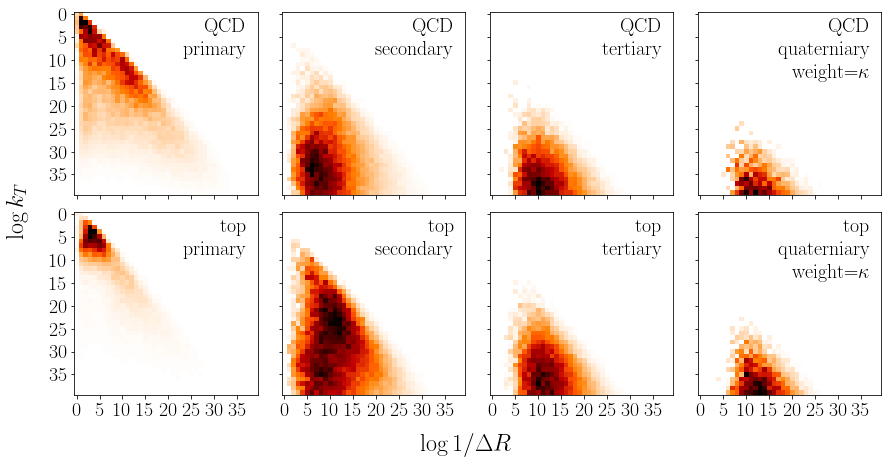

In [133]:
fig,axs = plt.subplots(2,4,figsize=(12,6))
bins = (50,50)
rnge = ((0,7),(-2,5))
cmap = 'gist_heat_r'

xt = range(0,40,5)
yt = range(0,40,5)

labelfont = FontProperties()
labelfont.set_family('serif')
labelfont.set_name('Times New Roman')
labelfont.set_size(20)

axislabelfont = FontProperties()
axislabelfont.set_family('serif')
axislabelfont.set_name('Times New Roman')
axislabelfont.set_size(24)

tickfont = FontProperties()
tickfont.set_family('serif')
tickfont.set_name('Times New Roman')
tickfont.set_size(20)

axisfontsize = 18
labelfontsize = 18
axs[0,0].imshow( qcd_lund_0_ohw_flat.reshape((40,40)), cmap=cmap )
axs[0,1].imshow( qcd_lund_1_ohw_flat.reshape((40,40)), cmap=cmap )
axs[0,2].imshow( qcd_lund_2_ohw_flat.reshape((40,40)), cmap=cmap )
axs[0,3].imshow( qcd_lund_3_ohw_flat.reshape((40,40)), cmap=cmap )
axs[1,0].imshow( top_lund_0_ohw_flat.reshape((40,40)), cmap=cmap )
axs[1,1].imshow( top_lund_1_ohw_flat.reshape((40,40)), cmap=cmap )
axs[1,2].imshow( top_lund_2_ohw_flat.reshape((40,40)), cmap=cmap )
axs[1,3].imshow( top_lund_3_ohw_flat.reshape((40,40)), cmap=cmap )

tpos1 = [37,1]
tpos2 = [37,6]
tpos3 = [37,11]

axs[0,0].text( tpos2[0], tpos2[1],  "primary", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( tpos2[0], tpos2[1],  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( tpos2[0], tpos2[1],  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( tpos2[0], tpos2[1],  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[0,0].text( tpos1[0], tpos1[1],  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( tpos1[0], tpos1[1],  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( tpos1[0], tpos1[1],  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( tpos1[0], tpos1[1],  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( tpos2[0], tpos2[1],  "primary", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( tpos2[0], tpos2[1],  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( tpos2[0], tpos2[1],  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( tpos2[0], tpos2[1],  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( tpos1[0], tpos1[1],  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( tpos1[0], tpos1[1],  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( tpos1[0], tpos1[1],  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( tpos1[0], tpos1[1],  "top", va='top', ha='right', fontproperties=labelfont )

axs[0,3].text( tpos3[0], tpos3[1],  "weight=$\kappa$", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( tpos3[0], tpos3[1],  "weight=$\kappa$", va='top', ha='right', fontproperties=labelfont )

axs[0,0].set_xticks( xt ) 
axs[0,1].set_xticks( xt ) 
axs[0,2].set_xticks( xt ) 
axs[0,3].set_xticks( xt ) 
axs[1,0].set_xticks( xt ) 
axs[1,1].set_xticks( xt ) 
axs[1,2].set_xticks( xt ) 
axs[1,3].set_xticks( xt )
axs[0,0].set_yticks( yt ) 
axs[0,1].set_yticks( yt ) 
axs[0,2].set_yticks( yt ) 
axs[0,3].set_yticks( yt ) 
axs[1,0].set_yticks( yt ) 
axs[1,1].set_yticks( yt )
axs[1,2].set_yticks( yt ) 
axs[1,3].set_yticks( yt ) 
axs[1,0].set_xticklabels( xt, fontproperties=tickfont )
axs[1,1].set_xticklabels( xt, fontproperties=tickfont )
axs[1,2].set_xticklabels( xt, fontproperties=tickfont )
axs[1,3].set_xticklabels( xt, fontproperties=tickfont )
axs[0,0].set_yticklabels( yt, fontproperties=tickfont )
axs[1,0].set_yticklabels( yt, fontproperties=tickfont )
axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,2].set_xticklabels([])
axs[0,3].set_xticklabels([])
axs[0,1].set_yticklabels([])
axs[0,2].set_yticklabels([])
axs[0,3].set_yticklabels([])
axs[1,1].set_yticklabels([])
axs[1,2].set_yticklabels([])
axs[1,3].set_yticklabels([])
fig.text( -0.03, 0.5, r'$\log k_T$', va='center', rotation='vertical', fontproperties=axislabelfont )
fig.text( 0.5, -0.05, r'$\log 1/\Delta R$', ha='center', fontproperties=axislabelfont )
fig.tight_layout()
fig.savefig("qcd_top_all_lund_wkap.pdf", bbox_inches = "tight")
#fig.show()a

In [144]:
df_qcd_in = pd.read_hdf( "../../toptagging_data/qcd_lund0_ohw_pt_100k.h5", key="table", start=0, stop=10000 )
df_top_in = pd.read_hdf( "../../toptagging_data/top_lund0_ohw_pt_100k.h5", key="table", start=0, stop=10000 )

data_qcd = np.zeros( ( df_qcd_in.shape[0], 1600 ) )
labels_qcd = np.zeros( df_qcd_in.shape[0] )
masses_qcd = np.zeros( df_qcd_in.shape[0] )
for i in range( df_qcd_in.shape[0] ):
    data_qcd[i] = df_qcd_in.to_numpy()[i][0:1600]
    labels_qcd[i] = df_qcd_in.to_numpy()[i][1600]
    masses_qcd[i] = df_qcd_in.to_numpy()[i][1601]
    
data_top = np.zeros( ( df_top_in.shape[0], 1600 ) )
labels_top = np.zeros( df_top_in.shape[0] )
masses_top = np.zeros( df_top_in.shape[0] )
for i in range( df_top_in.shape[0] ):
    data_top[i] = df_top_in.to_numpy()[i][0:1600]
    labels_top[i] = df_top_in.to_numpy()[i][1600]
    masses_top[i] = df_top_in.to_numpy()[i][1601]

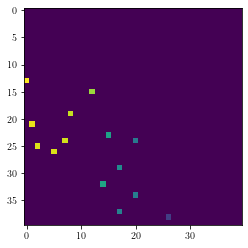

In [146]:
plt.imshow( data_qcd[1].reshape((40,40)) )

In [141]:
data_top.shape

(10000, 1600)

In [142]:
labels_top.shape

(10000,)

In [143]:
masses_top.shape

(10000,)